In [1]:
import sdeint
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def deterministic_piece(x, t, a, b, A):
    return b - a*x
def stochastic_piece(x, t, a, b, A):
    return A

In [139]:
def close(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc

In [151]:
timespan = np.linspace(0,20,200)
x0 = 3
alpha = 0.25
beta = 0.5
A = 0
noise_args = (alpha,beta,A)
srg_noise_out = sdeint.itoint(close(deterministic_piece, *noise_args),close(stochastic_piece, *noise_args),x0,timespan)

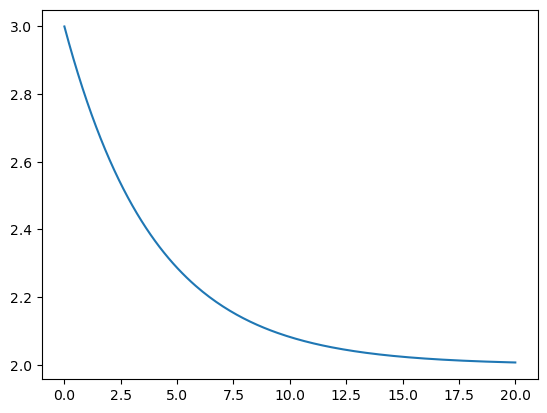

In [152]:
plt.plot(timespan, srg_noise_out, label = "no noise")

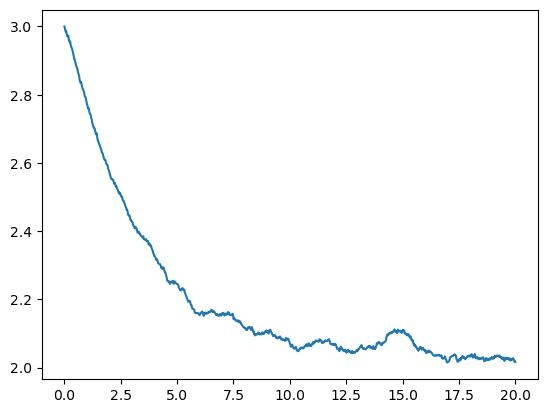

In [158]:
timespan = np.linspace(0,20,1001)

A = 0.02
noise_args = (alpha, beta, A)
srg_noise_out = sdeint.itoint(close(deterministic_piece, *noise_args),close(stochastic_piece, *noise_args),x0,timespan)

plt.plot(timespan, srg_noise_out, label = "with noise")

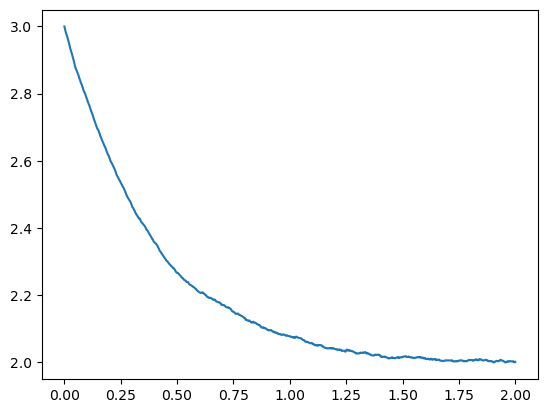

In [160]:
timespan = np.linspace(0,2,1001)

A = 0.02
noise_args = (10*alpha, 10*beta,A)
srg_noise_out = sdeint.itoint(close(deterministic_piece, *noise_args),close(stochastic_piece, *noise_args),x0,timespan)

plt.plot(timespan, srg_noise_out, label = "with noise")

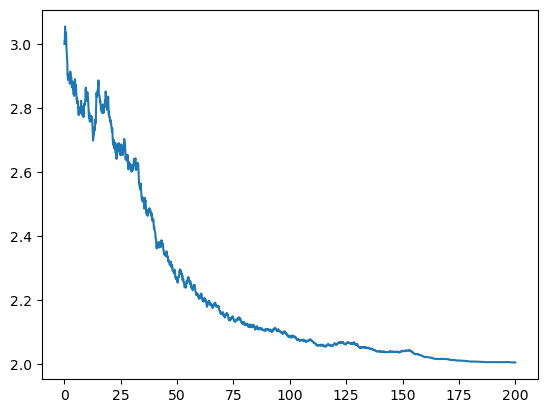

In [124]:
timespan = np.linspace(0,200,2000)

A = 1
noise_args = (0.1*alpha, 0.1*beta,A)
x0 = 3.
srg_noise_out = sdeint.itoint(close(deterministic_piece, *noise_args),close(stochastic_piece, *noise_args),x0,timespan)

plt.plot(timespan, srg_noise_out, label = "with noise")

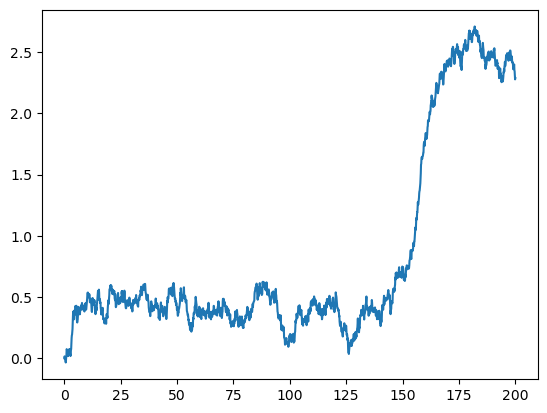

In [53]:
def deterministic_piece(x, t, a, b, b0, K, n, A):
    return b0 + b*x**n/(x**n + K**n) - a*x
def stochastic_piece(x, t, a, b, b0, K, n, A):
    return b*A

timespan = np.linspace(0,200,2000)

A = 0.15
alpha = 0.25
beta = 0.5
beta0 = 0.1
K = 1.
n = 6
x0 = 0.

noise_args = (alpha, beta, beta0, K, n, A)
srg_noise_out = sdeint.itoint(close(deterministic_piece, *noise_args),close(stochastic_piece, *noise_args),x0,timespan)

plt.plot(timespan, srg_noise_out, label = "with noise")

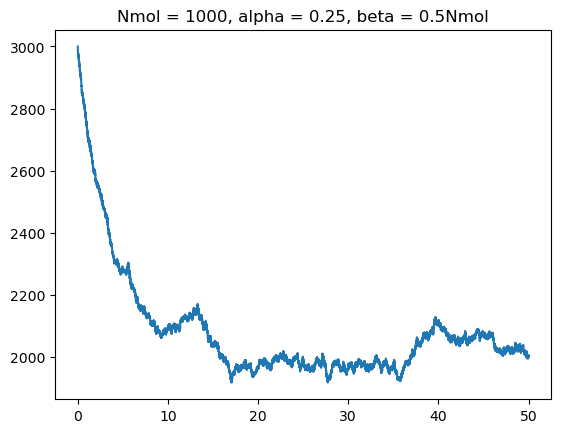

In [8]:
from numpy import random
import numpy as np

Nmol = 1000

alpha = 0.25
beta = 0.5*Nmol

def rprod(x):
    return beta

def rdeg(x):
    return alpha*x

Nsteps = 100000

x0 = 3.*Nmol
tmax = 50.

x_vec = np.zeros(Nsteps + 1)
x_vec[0] = x0
t_vec = np.zeros(Nsteps + 1)

reached = False
for i in range(1, Nsteps + 1):
    x_cur = x_vec[i - 1]

    #  evaluate all rates
    r1 = rprod(x_cur)
    r2 = rdeg(x_cur)
    rT = r1 + r2    # total rates

    # draw a waiting time
    t_wait = random.exponential(1/rT)

    # roulette-select which reaction to go
    if random.random() < r1/rT:
        x_next = x_cur + 1
    else:
        x_next = max(0, x_cur - 1)

    # update
    t_vec[i] = t_vec[i - 1] + t_wait
    x_vec[i] = x_next
    if t_vec[i] > tmax:
        reached = True
        break

if reached:
    t_vec = t_vec[:(i + 1)]
    x_vec = x_vec[:(i + 1)]
else:
    print("Warning: tmax not reached. Try increasing Nsteps")

plt.plot(t_vec, x_vec)
plt.title("Nmol = 1000, alpha = 0.25, beta = 0.5Nmol")
plt.show()

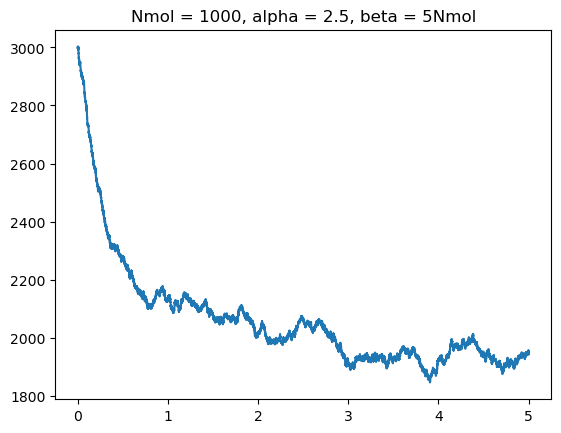

In [10]:
from numpy import random
import numpy as np

Nmol = 1000

alpha = 2.5
beta = 5.*Nmol

def rprod(x):
    return beta

def rdeg(x):
    return alpha*x

Nsteps = 100000

x0 = 3.*Nmol
tmax = 5.

x_vec = np.zeros(Nsteps + 1)
x_vec[0] = x0
t_vec = np.zeros(Nsteps + 1)

reached = False
for i in range(1, Nsteps + 1):
    x_cur = x_vec[i - 1]

    #  evaluate all rates
    r1 = rprod(x_cur)
    r2 = rdeg(x_cur)
    rT = r1 + r2    # total rates

    # draw a waiting time
    t_wait = random.exponential(1/rT)

    # roulette-select which reaction to go
    if random.random() < r1/rT:
        x_next = x_cur + 1
    else:
        x_next = max(0, x_cur - 1)

    # update
    t_vec[i] = t_vec[i - 1] + t_wait
    x_vec[i] = x_next
    if t_vec[i] > tmax:
        reached = True
        break

if reached:
    t_vec = t_vec[:(i + 1)]
    x_vec = x_vec[:(i + 1)]
else:
    print("Warning: tmax not reached. Try increasing Nsteps")

plt.plot(t_vec, x_vec)
plt.title("Nmol = 1000, alpha = 2.5, beta = 5Nmol")
plt.show()

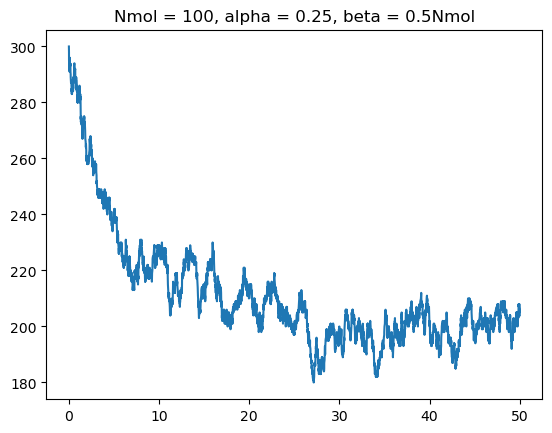

In [11]:
from numpy import random
import numpy as np

Nmol = 100

alpha = 0.25
beta = 0.5*Nmol

def rprod(x):
    return beta

def rdeg(x):
    return alpha*x

Nsteps = 100000

x0 = 3.*Nmol
tmax = 50.

x_vec = np.zeros(Nsteps + 1)
x_vec[0] = x0
t_vec = np.zeros(Nsteps + 1)

reached = False
for i in range(1, Nsteps + 1):
    x_cur = x_vec[i - 1]

    #  evaluate all rates
    r1 = rprod(x_cur)
    r2 = rdeg(x_cur)
    rT = r1 + r2    # total rates

    # draw a waiting time
    t_wait = random.exponential(1/rT)

    # roulette-select which reaction to go
    if random.random() < r1/rT:
        x_next = x_cur + 1
    else:
        x_next = max(0, x_cur - 1)

    # update
    t_vec[i] = t_vec[i - 1] + t_wait
    x_vec[i] = x_next
    if t_vec[i] > tmax:
        reached = True
        break

if reached:
    t_vec = t_vec[:(i + 1)]
    x_vec = x_vec[:(i + 1)]
else:
    print("Warning: tmax not reached. Try increasing Nsteps")

plt.plot(t_vec, x_vec)
plt.title("Nmol = 100, alpha = 0.25, beta = 0.5Nmol")
plt.show()

## Positive autoregulation

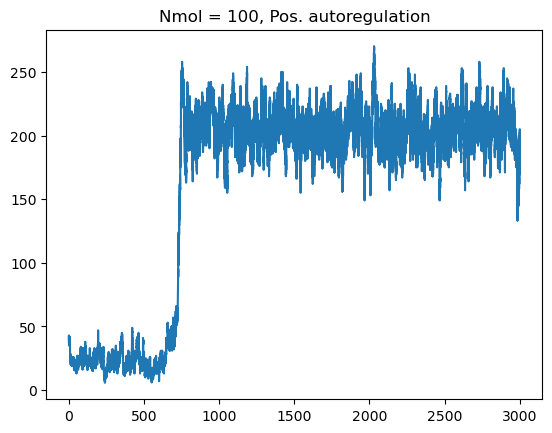

In [42]:
from numpy import random
import numpy as np

Nmol = 100

alpha = 0.25
beta = 0.5*Nmol
beta0 = 0.05*Nmol
K = 0.9*Nmol
n = 3

def rprod(x):
    return beta0 + beta*x**n/(x**n + K**n)

def rdeg(x):
    return alpha*x

Nsteps = 500000

x0 = 40
tmax = 3000.

x_vec = np.zeros(Nsteps + 1)
x_vec[0] = x0
t_vec = np.zeros(Nsteps + 1)

reached = False
for i in range(1, Nsteps + 1):
    x_cur = x_vec[i - 1]

    #  evaluate all rates
    r1 = rprod(x_cur)
    r2 = rdeg(x_cur)
    rT = r1 + r2    # total rates

    # draw a waiting time
    t_wait = random.exponential(1/rT)

    # roulette-select which reaction to go
    if random.random() < r1/rT:
        x_next = x_cur + 1
    else:
        x_next = max(0, x_cur - 1)

    # update
    t_vec[i] = t_vec[i - 1] + t_wait
    x_vec[i] = x_next
    if t_vec[i] > tmax:
        reached = True
        break

if reached:
    t_vec = t_vec[:(i + 1)]
    x_vec = x_vec[:(i + 1)]
else:
    print("Warning: tmax not reached. Try increasing Nsteps")

plt.plot(t_vec, x_vec)
plt.title("Nmol = 100, Pos. autoregulation")
plt.show()

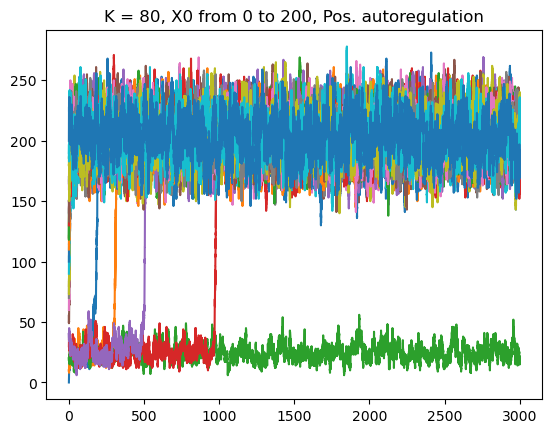

In [43]:
from numpy import random
import numpy as np

Nmol = 100

alpha = 0.25
beta = 0.5*Nmol
beta0 = 0.05*Nmol
K = 0.9*Nmol
n = 3

def rprod(x):
    return beta0 + beta*x**n/(x**n + K**n)

def rdeg(x):
    return alpha*x

Nsteps = 500000

x0_vec = range(0, 210, 10)
tmax = 3000.

plt.figure()
for x0 in x0_vec:
    x_vec = np.zeros(Nsteps + 1)
    x_vec[0] = x0
    t_vec = np.zeros(Nsteps + 1)
    
    reached = False
    for i in range(1, Nsteps + 1):
        x_cur = x_vec[i - 1]
    
        #  evaluate all rates
        r1 = rprod(x_cur)
        r2 = rdeg(x_cur)
        rT = r1 + r2    # total rates
    
        # draw a waiting time
        t_wait = random.exponential(1/rT)
    
        # roulette-select which reaction to go
        if random.random() < r1/rT:
            x_next = x_cur + 1
        else:
            x_next = max(0, x_cur - 1)
    
        # update
        t_vec[i] = t_vec[i - 1] + t_wait
        x_vec[i] = x_next
        if t_vec[i] > tmax:
            reached = True
            break
    
    if reached:
        t_vec = t_vec[:(i + 1)]
        x_vec = x_vec[:(i + 1)]
    else:
        print("Warning: tmax not reached. Try increasing Nsteps")

    plt.plot(t_vec, x_vec)
    
plt.title("K = 80, X0 from 0 to 200, Pos. autoregulation")
plt.show()

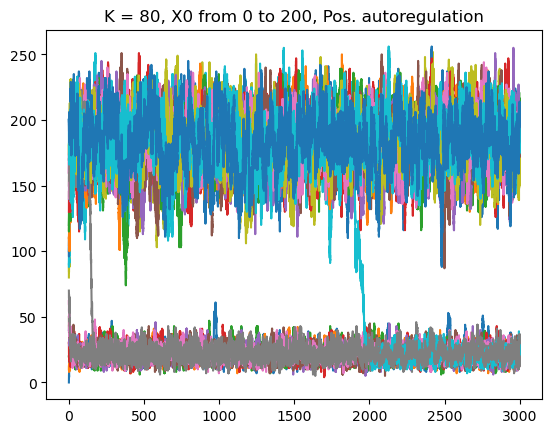

In [45]:
from numpy import random
import numpy as np

Nmol = 100

alpha = 0.25
beta = 0.5*Nmol
beta0 = 0.05*Nmol
K = 1.1*Nmol
n = 3

def rprod(x):
    return beta0 + beta*x**n/(x**n + K**n)

def rdeg(x):
    return alpha*x

Nsteps = 500000

x0_vec = range(0, 210, 10)
tmax = 3000.

plt.figure()
for x0 in x0_vec:
    x_vec = np.zeros(Nsteps + 1)
    x_vec[0] = x0
    t_vec = np.zeros(Nsteps + 1)
    
    reached = False
    for i in range(1, Nsteps + 1):
        x_cur = x_vec[i - 1]
    
        #  evaluate all rates
        r1 = rprod(x_cur)
        r2 = rdeg(x_cur)
        rT = r1 + r2    # total rates
    
        # draw a waiting time
        t_wait = random.exponential(1/rT)
    
        # roulette-select which reaction to go
        if random.random() < r1/rT:
            x_next = x_cur + 1
        else:
            x_next = max(0, x_cur - 1)
    
        # update
        t_vec[i] = t_vec[i - 1] + t_wait
        x_vec[i] = x_next
        if t_vec[i] > tmax:
            reached = True
            break
    
    if reached:
        t_vec = t_vec[:(i + 1)]
        x_vec = x_vec[:(i + 1)]
    else:
        print("Warning: tmax not reached. Try increasing Nsteps")

    plt.plot(t_vec, x_vec)
    
plt.title("K = 80, X0 from 0 to 200, Pos. autoregulation")
plt.show()

Ask the students to tune the noise

Tune the parameters 